In [2]:
import pandas as pd 
NAME_RESULT = 'ML for Smart Grid - Result-Final.csv'

df = pd.read_csv(NAME_RESULT, header=None)
df

,0,1,2,3,4,5,6,7,8,9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,SC,SS,SC,SS,SC,SS,SC,SS
3,Household,NaN,0,NaN,6,NaN,13,NaN,28,NaN
4,25,DQN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,DDQN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,A2C,0.6232,0.1249,0.9887,0.1982,0.9823,0.1970,0.9363,0.1877
7,NaN,PPO,0.6232,0.1249,0.9935,0.1991,0.9979,0.2001,0.9989,0.2003
8,NaN,MPC,0.6232,0.1249,0.9941,0.1992,0.9985,0.2001,1.0000,0.2003
9,NaN,NaN,1,NaN,4,NaN,8,NaN,15,NaN


In [3]:
NUM_MODELS = 5
NUM_BATTS = 4
SOC_CAPS = []
HOUSEHOLDS = []
MODELS = []
num_model = 0
do_soc_cap = False
do_models = False
household_name = ''
for index, row in df.iterrows():
    if(row[0] == 'Household'):  
        do_soc_cap = True

    if do_soc_cap == True:
        soc_caps = []
        for i in range(NUM_BATTS):
            soc_caps.append(row[i*2 + 2])
        SOC_CAPS.append(soc_caps)
        do_models = True
        do_soc_cap = False
    elif do_models == True:
        if num_model == 0:
            household_name = row[0]            
        scss = []
        for i in range(NUM_BATTS):
            scss.append([row[i*2+2], row[i*2+3]])
        MODELS.append({row[1]:scss})
        num_model +=1
        if num_model == NUM_MODELS:
            HOUSEHOLDS.append({household_name:MODELS})
            do_soc_cap = True
            do_models = False
            num_model = 0
            MODELS = []
        

[['0', '6', '13', '28'], ['1', '4', '8', '15'], ['4', '8', '12', '19'], ['25', '33', '41', '58']]


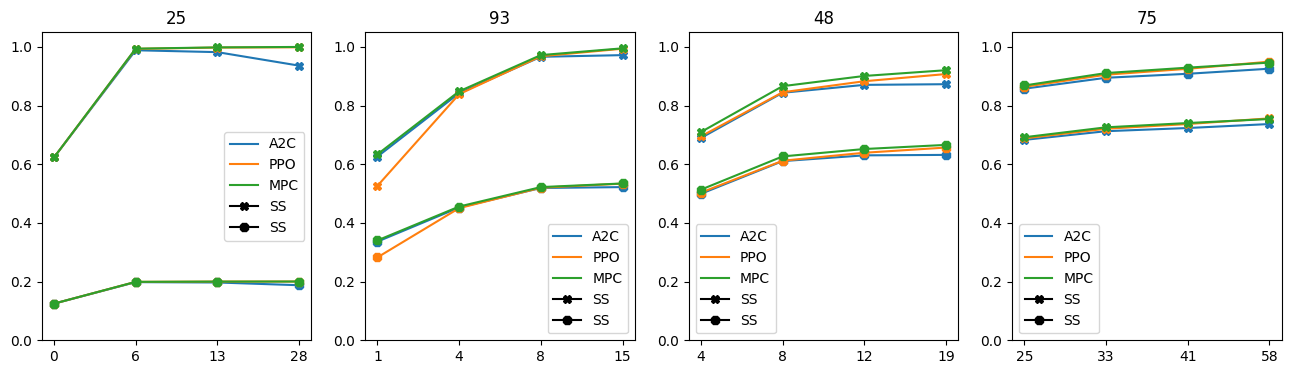

In [54]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np 

print(SOC_CAPS)

ncols = len(HOUSEHOLDS)
fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(16,4))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

for i, items in enumerate(HOUSEHOLDS):
    for h in items:
        axes[i].title.set_text(f'{h}')
        cp = 0        
        markers = []
        for j, m in enumerate(items[h]):
            for d in m:
                tmp = np.array(m[d], dtype=float)
                if np.any(np.isnan(tmp)) == False :
                    sc_hdl, = axes[i].plot(SOC_CAPS[i], np.array(m[d], dtype=float)[:, 0], label=f'{d}-SC', marker='X', color=colors[cp])
                    ss_hdl, = axes[i].plot(SOC_CAPS[i], np.array(m[d], dtype=float)[:, 1], label=f'{d}-SS', marker='8', color=colors[cp])
                    axes[i].set_ylim([0., 1.05])
                    markers.append(mlines.Line2D([], [], color=colors[cp], label=f'{d}'))
                    cp += 1
                    # print('exp', i, np.array(m[d]))
                    
        markers.append(mlines.Line2D([], [], color='black', marker='X', label='SS'))
        markers.append(mlines.Line2D([], [], color='black', marker='8', label='SS'))
        axes[i].legend(handles=markers)